# 타이타닉 데이터 분석 

## 사전 준비

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
# PC에서 그림 설정
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [6, 4]})

In [383]:
# PC에서 한글 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [384]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [385]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [386]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

## 타이타닉 분석

In [387]:
tdf = pd.read_csv('../TitanicData/titanic1309.csv')
tdf.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1046,1047,0,3,"Duquemin, Mr. Joseph",male,24.0,0,0,S.O./P.P. 752,7.55,NaN,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.50,NaN,S
962,963,0,3,"Minkoff, Mr. Lazar",male,21.0,0,0,349211,7.90,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.27,D20,C
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.10,NaN,S


### 열 설명
- Survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- name : 이름
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- ticket : 티켓 번호
- fare : 요금
- cabin : 객실 번호
- embarked : 탑승 항구

In [388]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [389]:
tdf.value_counts()

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare    Cabin            Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.28   C85              C           1
916          1         1       Ryerson, Mrs. Arthur Larned (Emily Maria Borie)      female  48.0  1      3      PC 17608  262.38  B57 B59 B63 B66  C           1
821          1         1       Hays, Mrs. Charles Melville (Clara Jennings Gregg)   female  52.0  1      1      12749     93.50   B69              S           1
824          1         3       Moor, Mrs. (Beila)                                   female  27.0  0      1      392096    12.47   E121             S           1
836          1         1       Compton, Miss. Sara Rebecca                          female  39.0  1      1      PC 17756  83.16   E49              C           1
                                       

In [390]:
tdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,33.30
std,378.02,0.48,0.84,14.41,1.04,0.87,51.76
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,7.90
50%,655.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,982.00,1.00,3.00,39.00,1.00,0.00,31.27
max,1309.00,1.00,3.00,80.00,8.00,9.00,512.33


In [391]:
tdf.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 결측치 처리
나이와 표 값, 탑승 항구, 객실 번호에서 결측값이 존재한다.   
  
결측값 처리를 위해서 나이, 표값은 중앙값으로 채워주고 이번 분석에 쓰지 않을 객실 번호 열은 삭제한다.  

In [392]:
tdf['Embarked'] = tdf['Embarked'].dropna()
tdf = tdf.drop('Cabin', axis=1)

In [393]:
tdf['Age'] = tdf['Age'].fillna(28)  # AGE의 중앙 값
tdf['Fare'] = tdf['Fare'].fillna(14.45) # Fare의 중앙값
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


## 남녀 생존률

In [394]:
tdf['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

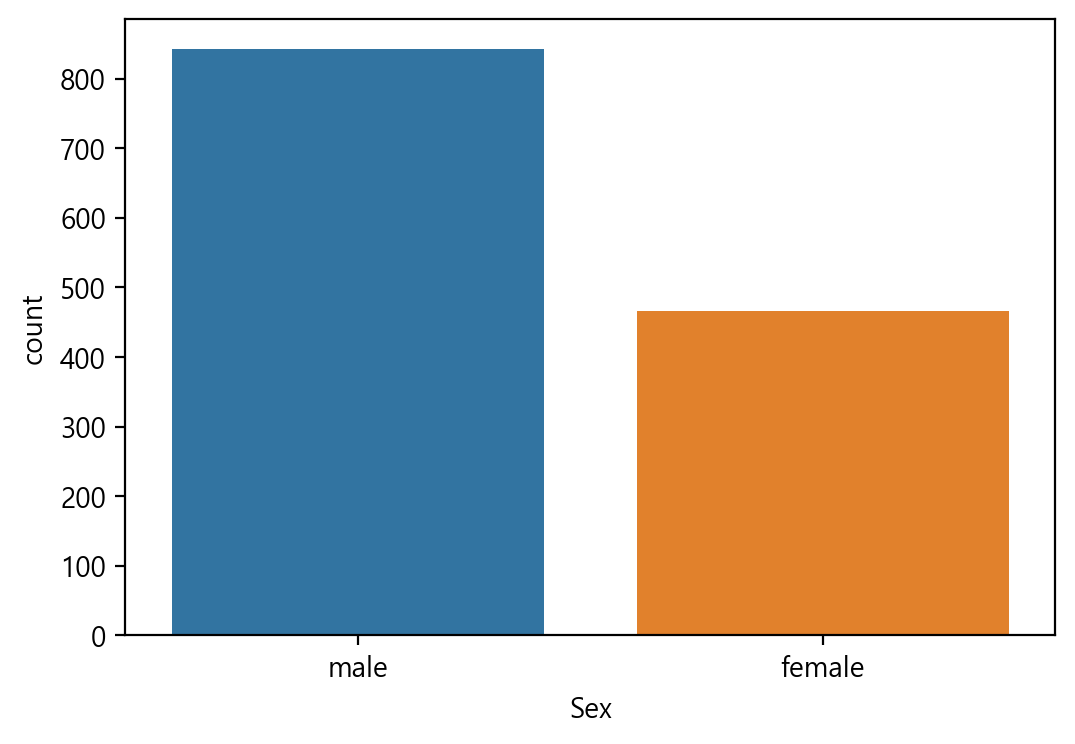

In [395]:
sns.countplot(tdf, x='Sex', hue = 'Sex');

In [396]:
male_tdf = tdf[tdf['Sex'] == 'male']
female_tdf = tdf[tdf['Sex'] == 'female']

# 생존/사망 카운트
male_counts = male_tdf['Survived'].value_counts().sort_index()
female_counts = female_tdf['Survived'].value_counts().sort_index()


In [397]:
female_counts

Survived
0     81
1    385
Name: count, dtype: int64

In [398]:
tdf['Survived'].value_counts().sort_index()

Survived
0    815
1    494
Name: count, dtype: int64

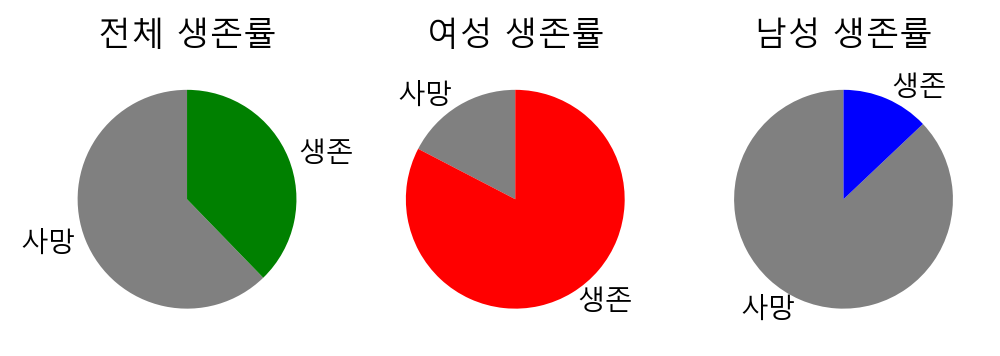

In [399]:
plt.subplot(131)
plt.pie(tdf['Survived'].value_counts().sort_index(), labels= ['사망', '생존'], startangle=90, colors=['grey', 'green'])
plt.title('전체 생존률')

plt.subplot(132)
plt.pie(female_counts, labels= ['사망', '생존'], startangle=90, colors=['grey', 'red'])
plt.title('여성 생존률')

plt.subplot(133)
plt.pie(male_counts, labels= ['사망', '생존'], startangle=90, colors=['grey', 'blue'])
plt.title("남성 생존률")

plt.show()

## 티켓 값의 상승에 따라 좌석과 생존 구분

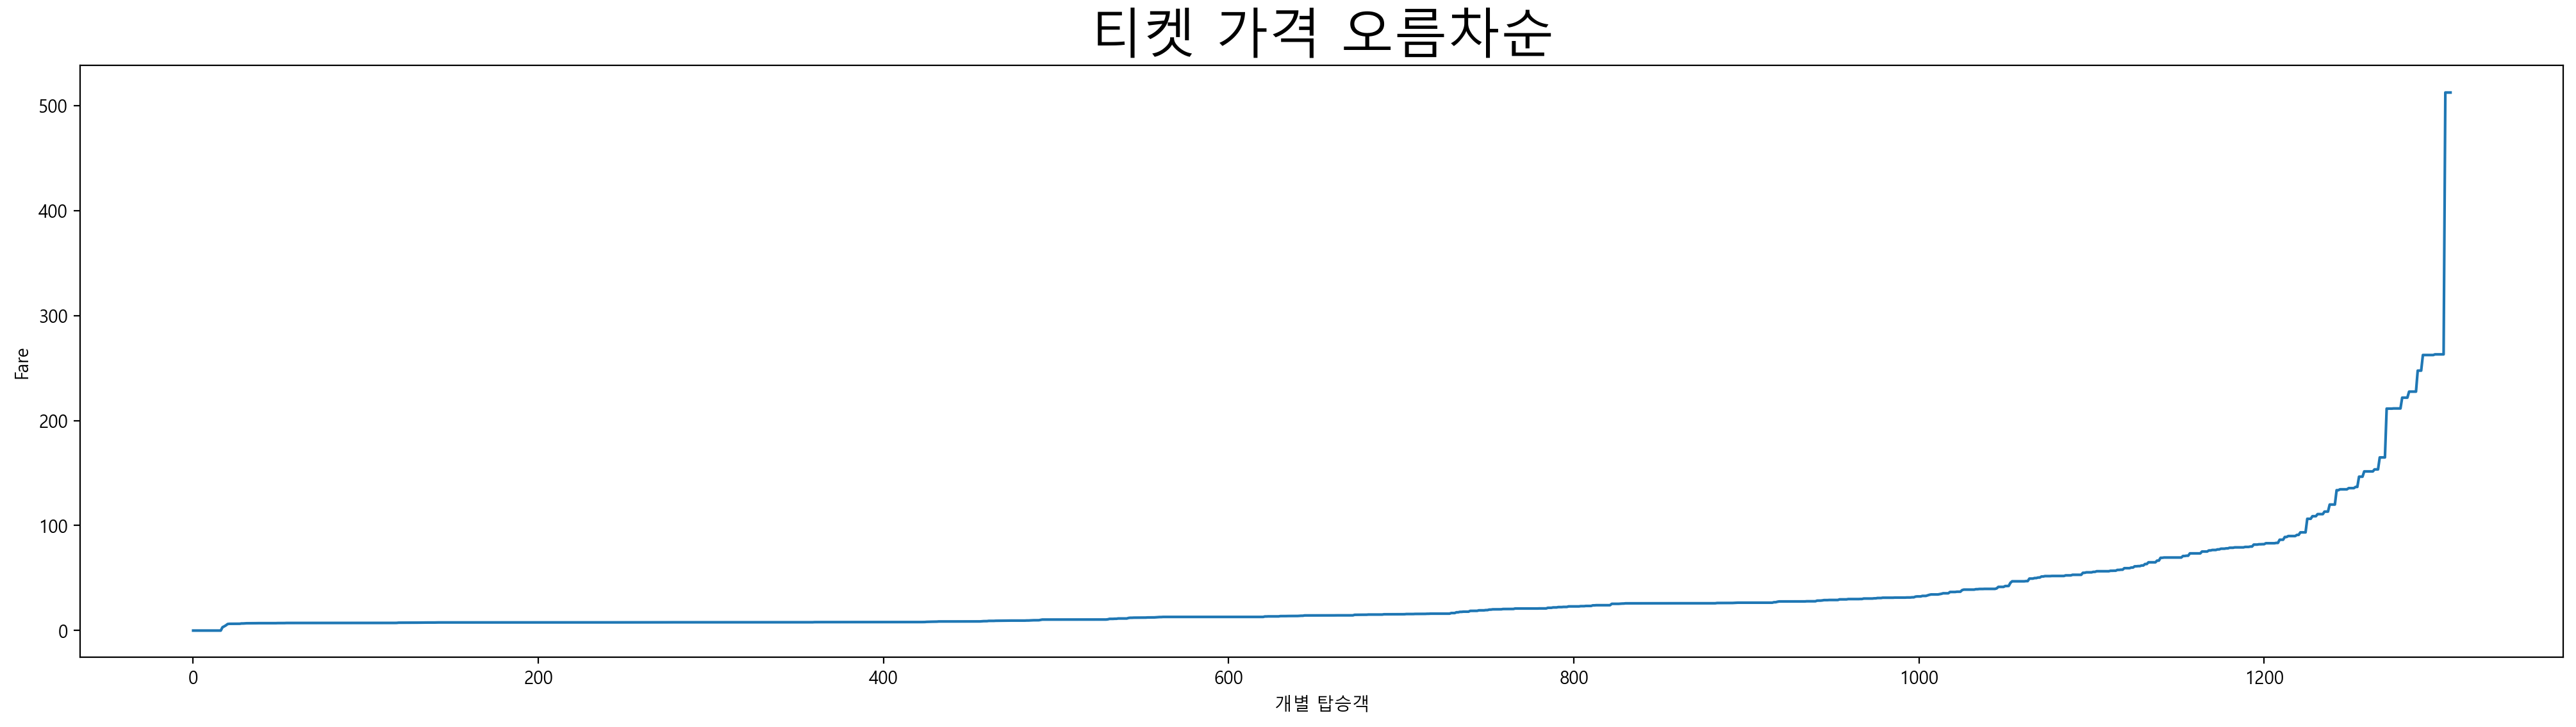

In [400]:
# 티켓 오름차순으로 그래프 수정
tdf = tdf.sort_values(by=['Fare'] ,ascending=True)
tdf.index = range(len(tdf))

# 티켓 가격 상승 그래프
plt.figure(figsize=(25, 6))
sns.lineplot(x=tdf.index, y='Fare', data=tdf);
plt.xlabel('개별 탑승객')
plt.title("티켓 가격 오름차순" , fontsize=30);

In [401]:
# 돈이 가장 많으면 1등석에다가 생존했을 것이라고 예상 가능하다
tdf[['Pclass' , 'Fare', 'Survived','Embarked']].tail(10)
# 이대로 냅두면 막대기 길이가 500 이상이니까 확실한 지역과 생존임으로 이상치을 이전의 최대 길이로 줄어야 겠다.

,Pclass,Fare,Survived,Embarked
1299,1,263.00,1,S
1300,1,263.00,0,S
1301,1,263.00,1,S
1302,1,263.00,1,S
1303,1,263.00,1,S
1304,1,263.00,0,S
1305,1,512.33,1,C
1306,1,512.33,1,C
1307,1,512.33,1,C
1308,1,512.33,1,C


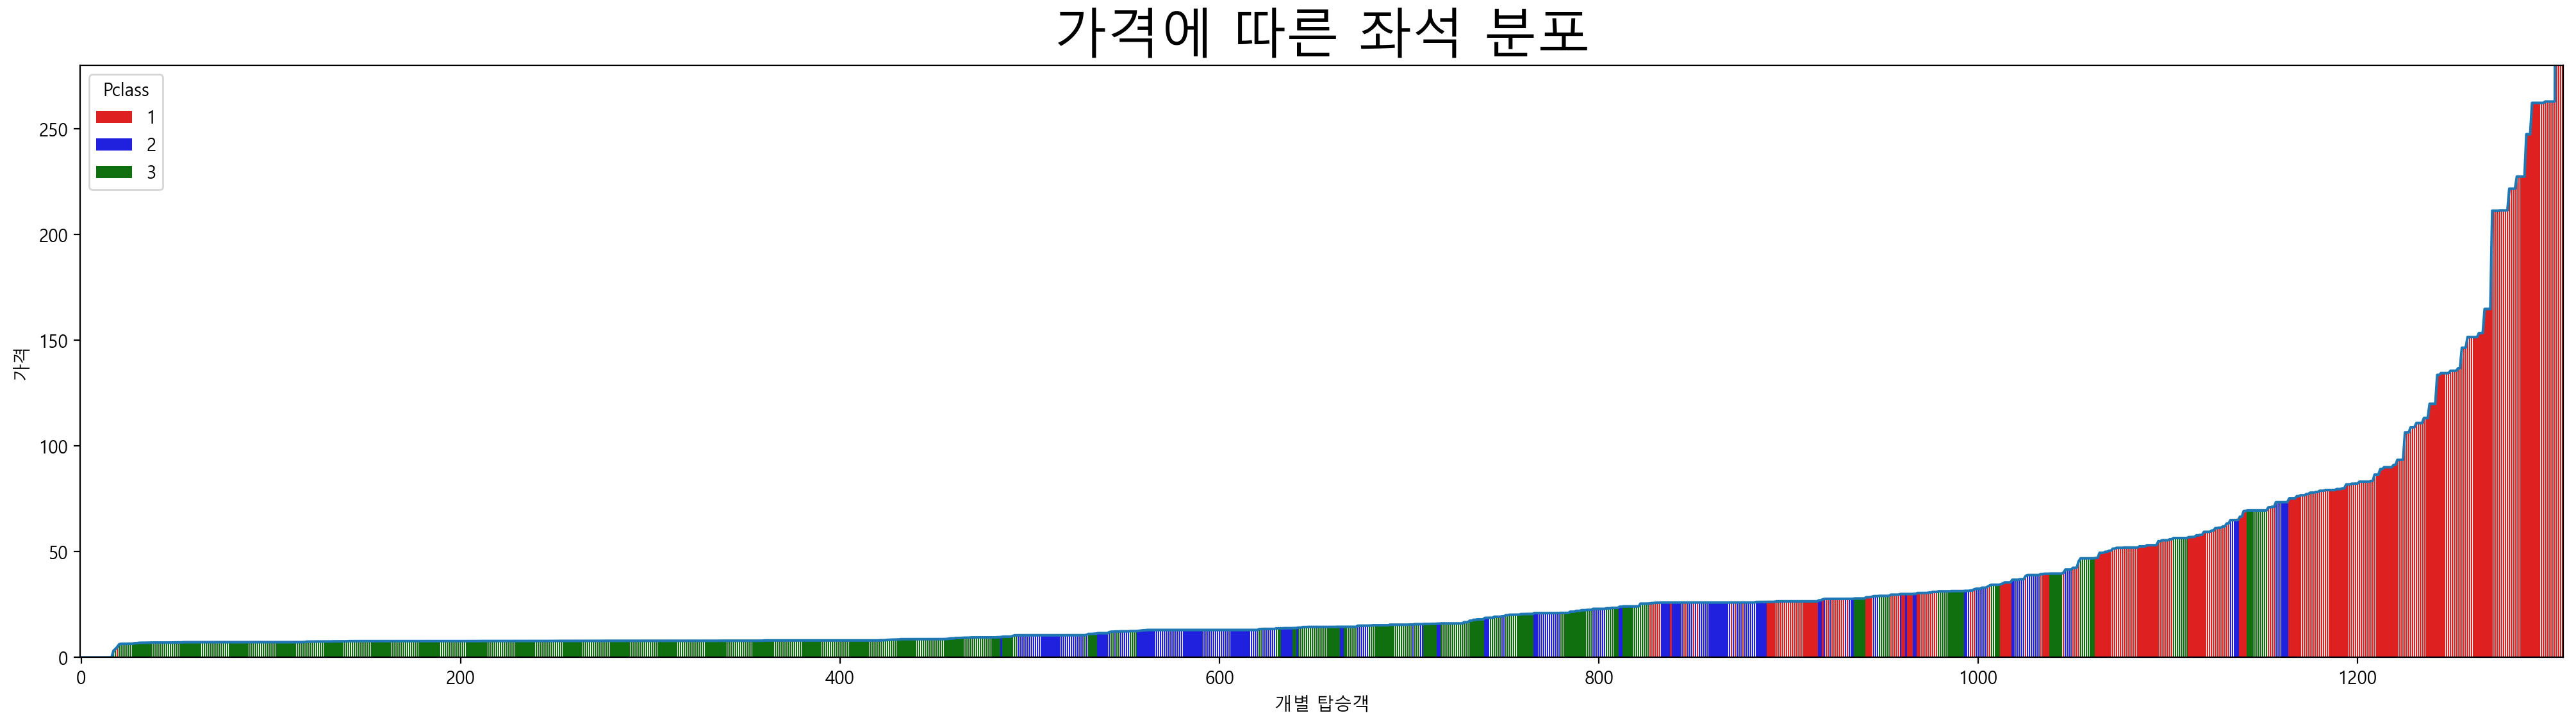

In [402]:
# 가격에 따라 Pclass의 비용

plt.figure(figsize=(25, 6))

sns.lineplot(x=tdf.index, y='Fare', data=tdf)
sns.barplot(x=tdf.index, y='Fare', hue='Pclass', data=tdf, palette={1: 'red', 2: 'blue' , 3:'green'}).set(ylim=(0, 280))
plt.xticks(ticks=np.arange(0, tdf.shape[0], 200), labels=np.arange(0, tdf.shape[0], 200))
plt.xlabel('개별 탑승객')
plt.ylabel('가격')
plt.title("가격에 따른 좌석 분포" , fontsize=30);

In [403]:
tdf['Survived'] = np.where(tdf['Survived'] == 0, '사망', '생존')

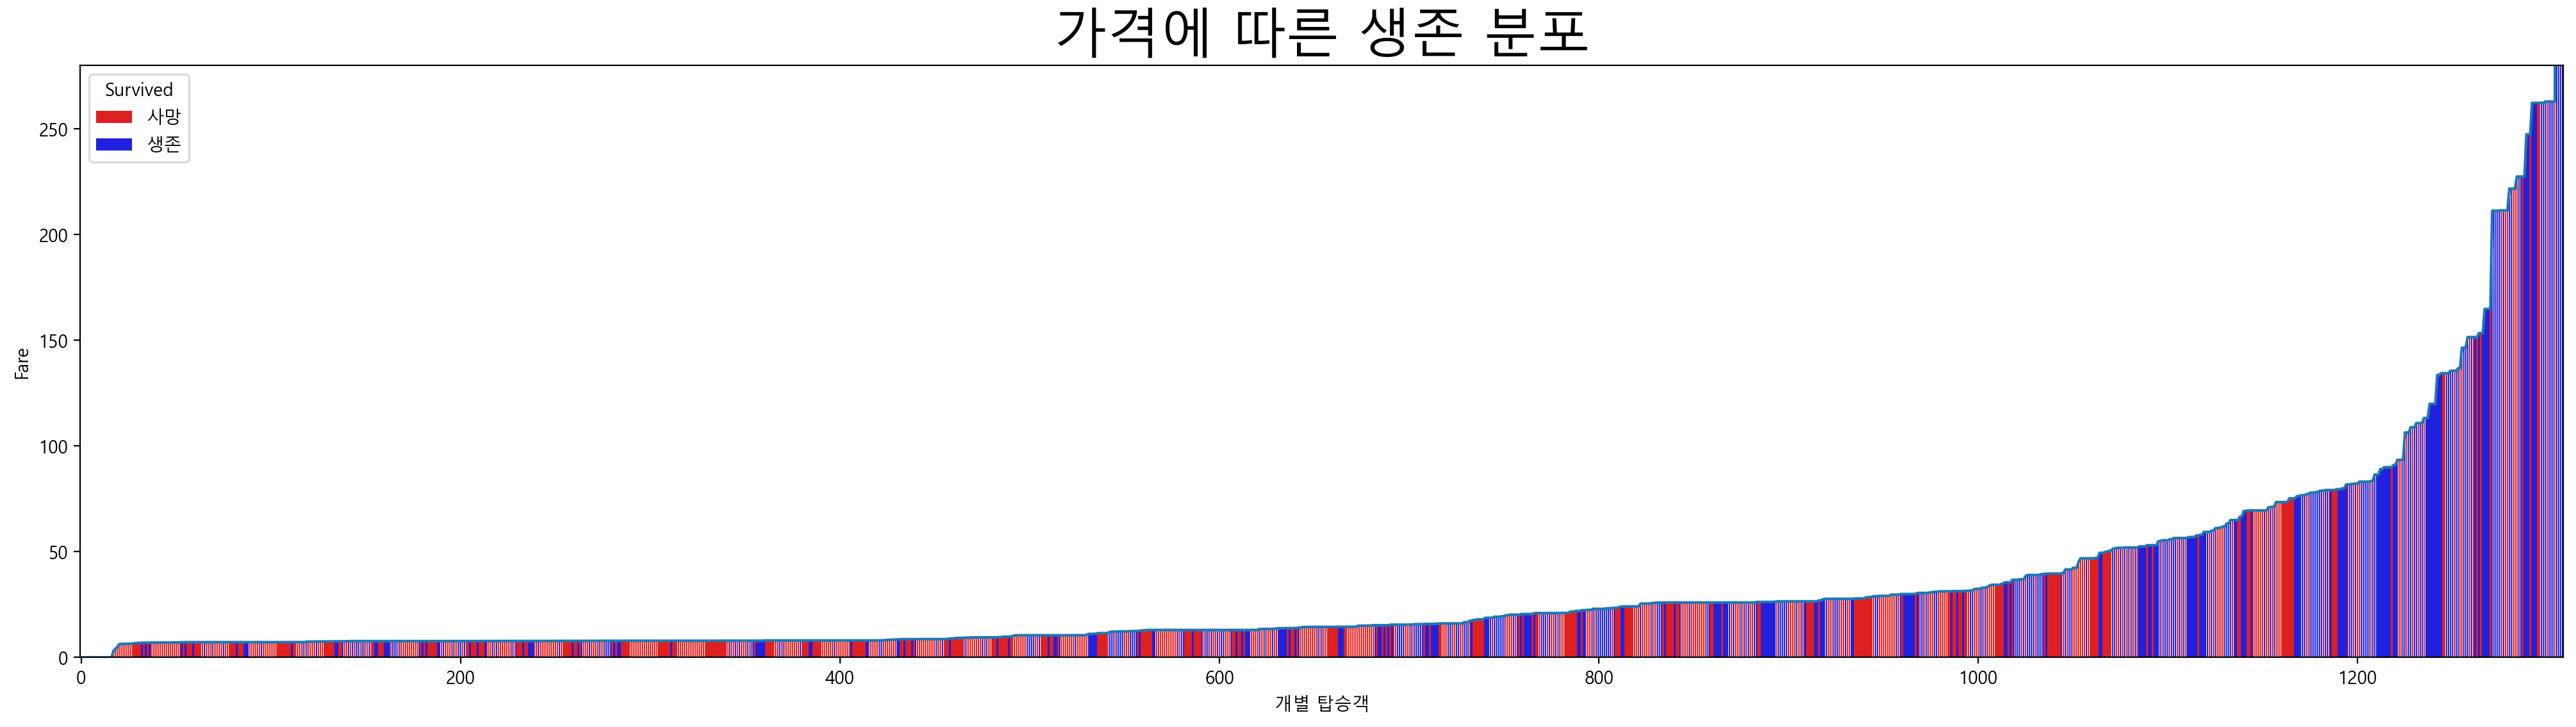

In [404]:
# 티켓 가격에 따른 생존
plt.figure(figsize=(25, 6))
sns.lineplot(x=tdf.index, y='Fare', data=tdf)
sns.barplot(x=tdf.index, y='Fare', hue='Survived', data=tdf, palette={'사망': 'red', '생존': 'blue'}).set(ylim=(0, 280))
plt.xticks(ticks=np.arange(0, tdf.shape[0], 200), labels=np.arange(0, tdf.shape[0], 200));
plt.xlabel('개별 탑승객')
plt.title("가격에 따른 생존 분포" , fontsize=30);

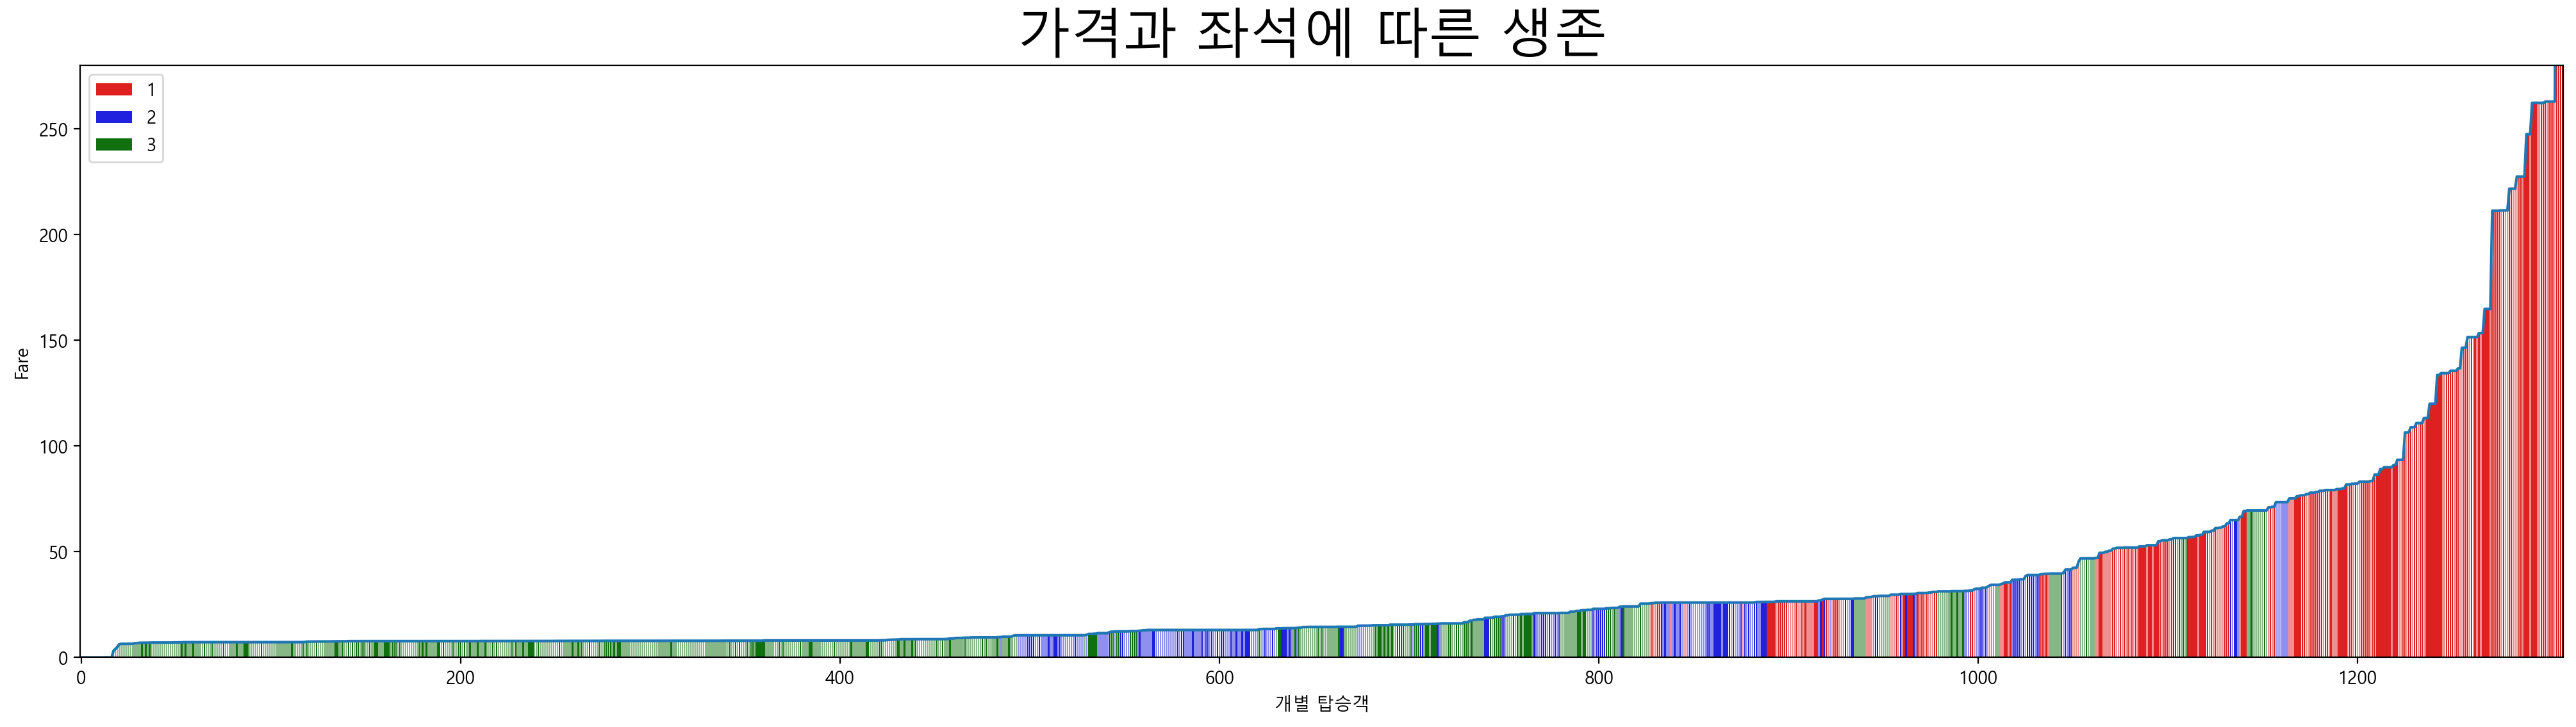

In [ ]:
# 가격에 따라 Pclass의 생환자들
plt.figure(figsize=(25, 6))

sns.lineplot(x=tdf.index, y='Fare', data=tdf)
sns.barplot(x=tdf.index, y='Fare', hue='Pclass', data=tdf, palette={1: 'red', 2: 'blue' , 3:'green'}).set(ylim=(0, 280))

# 죽은 사람은 하얀막대기 불투명도 50% 를 입혀 좌석과 동시에 생존과 사망을 동시에 확인할 수 있다.
sns.barplot(x=tdf[tdf['Survived'] == '사망'].index,y='Fare', data=tdf[tdf['Survived'] == '사망'], color='white' , alpha=0.5)

plt.xticks(ticks=np.arange(0, tdf.shape[0], 200), labels=np.arange(0, tdf.shape[0], 200));
plt.xlabel('개별 탑승객');

# 이러면 대충 보이는데 x폭이 너무 쫍아 정확하게 볼 수 없다. 이러면 지역별로 나눠야 겠다.
plt.title("가격과 좌석에 따른 생존 " , fontsize=30);

## 각 지역의 티켓값 상승에 따라 Pclass의 생존
### 타이타닉 항구 순서
#### s -> c -> q



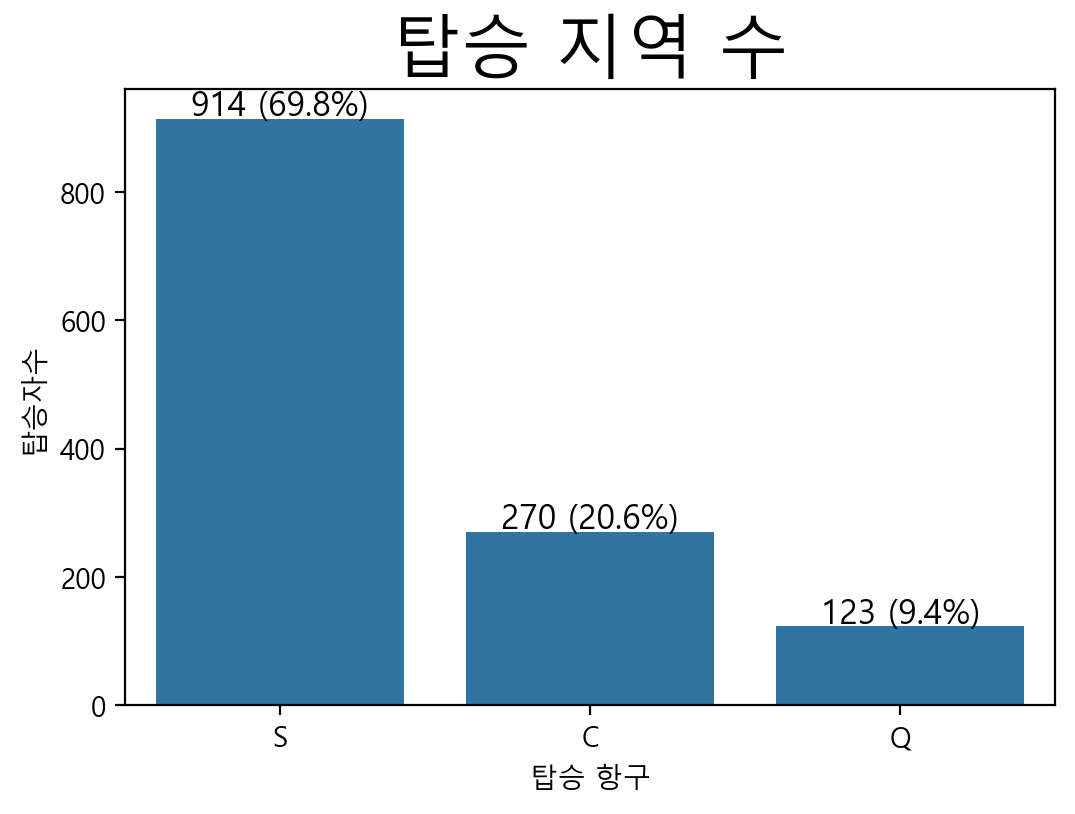

In [ ]:
ax = sns.countplot(x='Embarked', data=tdf)

# 전체 개수
total = len(tdf)

# 막대 위에 텍스트 추가
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 5, f"{count} ({percent:.1f}%)", ha='center', fontsize=12);

plt.xlabel("탑승 항구")
plt.ylabel("탑승자수")
plt.title("탑승 지역 수" , fontsize=25);

 C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

KeyError: 1

<Figure size 2500x600 with 0 Axes>

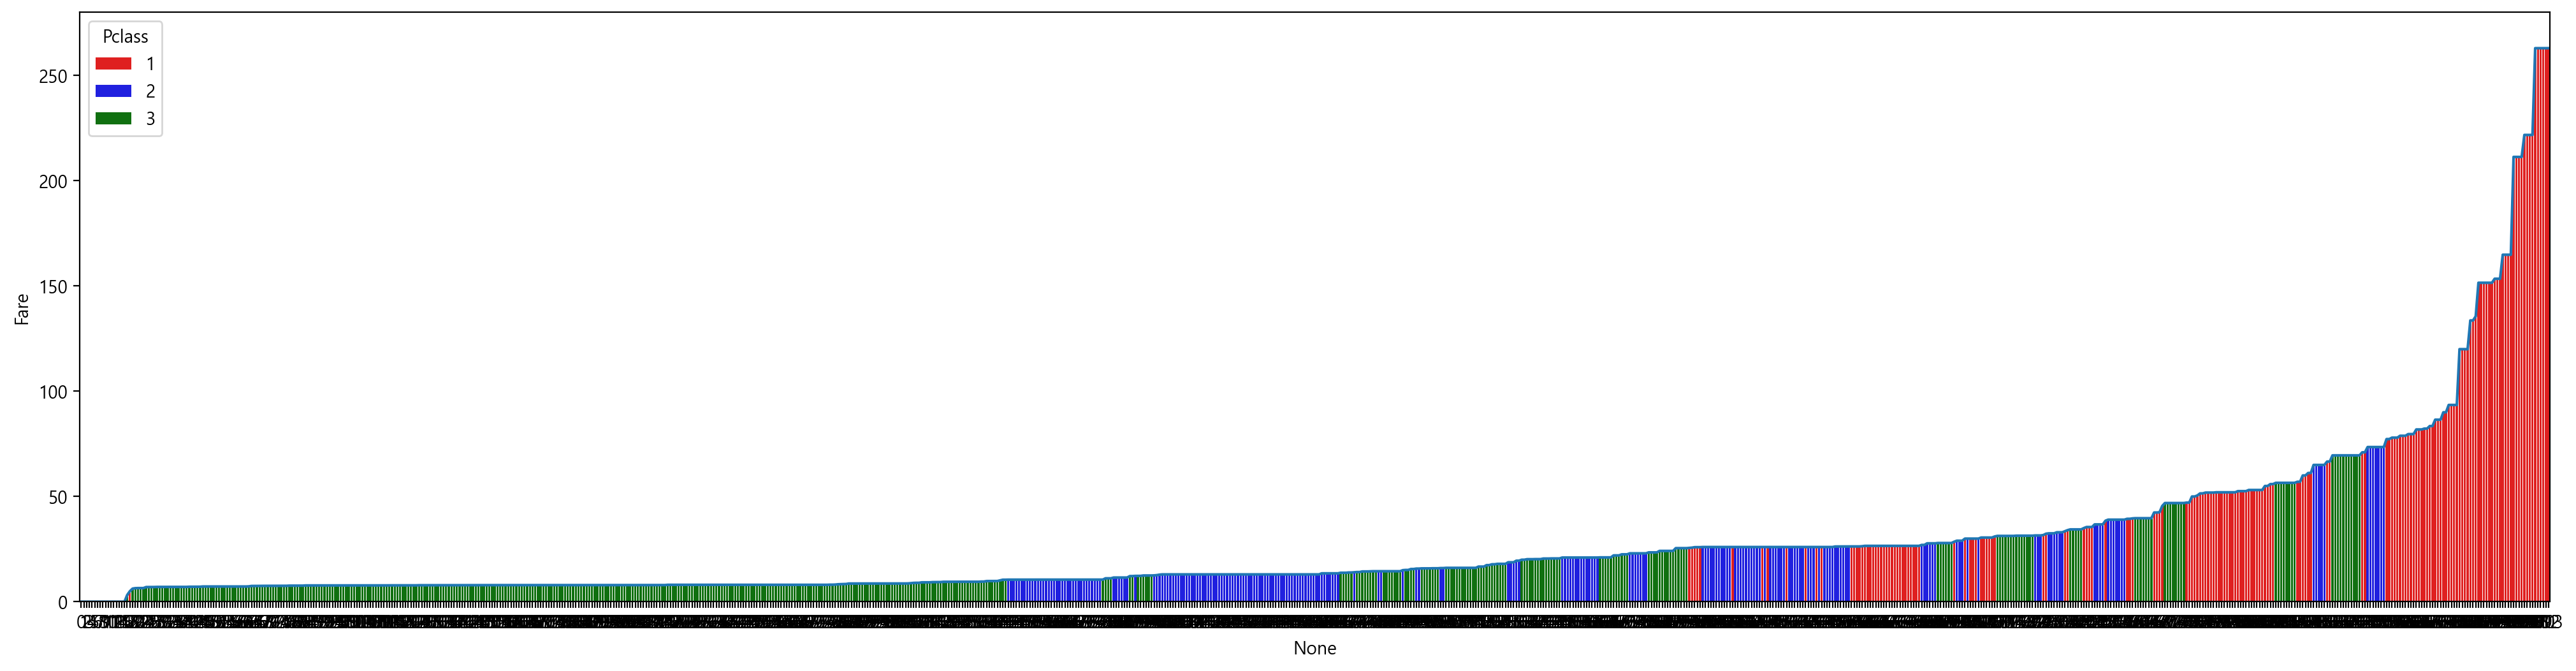

In [407]:
# S 지역의 티켓 값의 증가에 대한 생환자들의 클래스 장소
plt.figure(figsize=(25, 6))
tdfS = tdf[tdf['Embarked'] == 'S']
tdfS = tdfS.sort_values(by=['Fare'] ,ascending=True)
tdfS.index = range(len(tdfS))
tdfa = tdfS[tdfS['Survived'] == 0]

plt.figure(figsize=(25, 6));
ax = sns.lineplot(x=tdfS.index, y='Fare', data=tdfS)
sns.barplot(x=tdfS.index, y='Fare', hue='Pclass', data=tdfS, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfS[tdfS['Survived'] == 0].index,y='Fare', data=tdfS[tdfS['Survived'] == 0], color='white', alpha=0.7)
plt.ylim(0, 280);
# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()

cC = tdf[(tdf['Survived'] == 1) & (tdf['Embarked'] == 'S')].groupby('Pclass').count()
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

legend_labels = {
    1: "Pclass 1 (Survived " + str(name1) +")",
    2: "Pclass 2 (Survived " + str(name2) +")",
    3: "Pclass 3 (Survived " + str(name3) +")"
}

cC0 = tdf[tdf['Embarked'] == 'S'].groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "Pclass 1 (Survived " + str(name1) +") / "+ str(nam1),
    2: "Pclass 2 (Survived " + str(name2) +") / "+ str(nam2),
    3: "Pclass 3 (Survived " + str(name3) +") / "+ str(nam3)
}

newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='S Area Pclass number' ,  fontsize=24, title_fontsize=20);

plt.xticks(ticks=np.arange(0, tdfS.shape[0], 20), labels=np.arange(0, tdfS.shape[0], 20));
plt.title("Acending Fare S Area Pclass Survived" , fontsize=30);
plt.xlabel('Ascending');

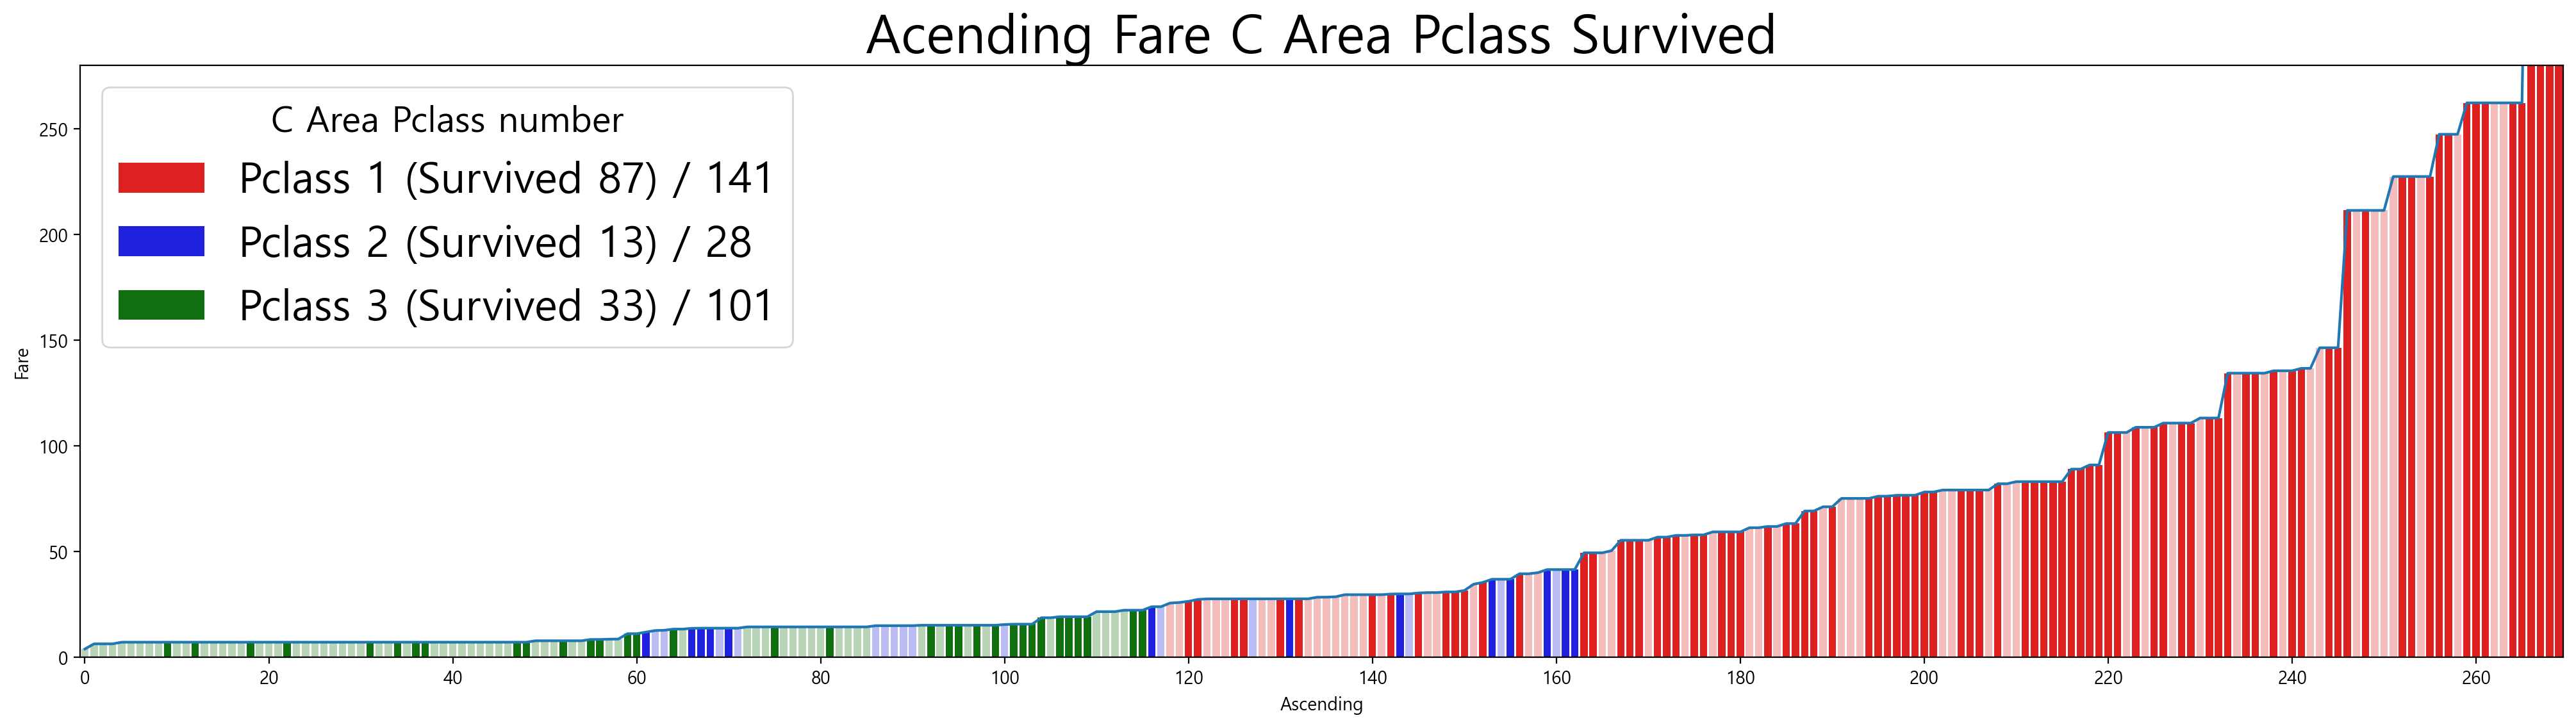

In [ ]:
# C 지역의 티켓 값의 증가에 대한 생환자들의 클래스 장소
tdfC = tdf[tdf['Embarked'] == 'C']
tdfC = tdfC.sort_values(by=['Fare'] ,ascending=True)
tdfC.index = range(len(tdfC))

plt.figure(figsize=(25, 6))
sns.lineplot(x=tdfC.index, y='Fare', data=tdfC)

ax = sns.barplot(x=tdfC.index, y='Fare', hue='Pclass', data=tdfC, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfC[tdfC['Survived'] == 0].index,y='Fare', data=tdfC[tdfC['Survived'] == 0], color='white' , alpha=0.7)
plt.ylim(0, 280)

# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()

cC = tdf[(tdf['Survived'] == 1) & (tdf['Embarked'] == 'C')].groupby('Pclass').count()
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdf[tdf['Embarked'] == 'C'].groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "Pclass 1 (Survived " + str(name1) +") / "+ str(nam1),
    2: "Pclass 2 (Survived " + str(name2) +") / "+ str(nam2),
    3: "Pclass 3 (Survived " + str(name3) +") / "+ str(nam3)
}

newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='C Area Pclass number' ,  fontsize=24, title_fontsize=20);
plt.xticks(ticks=np.arange(0, tdfC.shape[0], 20), labels=np.arange(0, tdfC.shape[0], 20));
plt.title("Acending Fare C Area Pclass Survived" , fontsize=30)
plt.xlabel('Ascending');

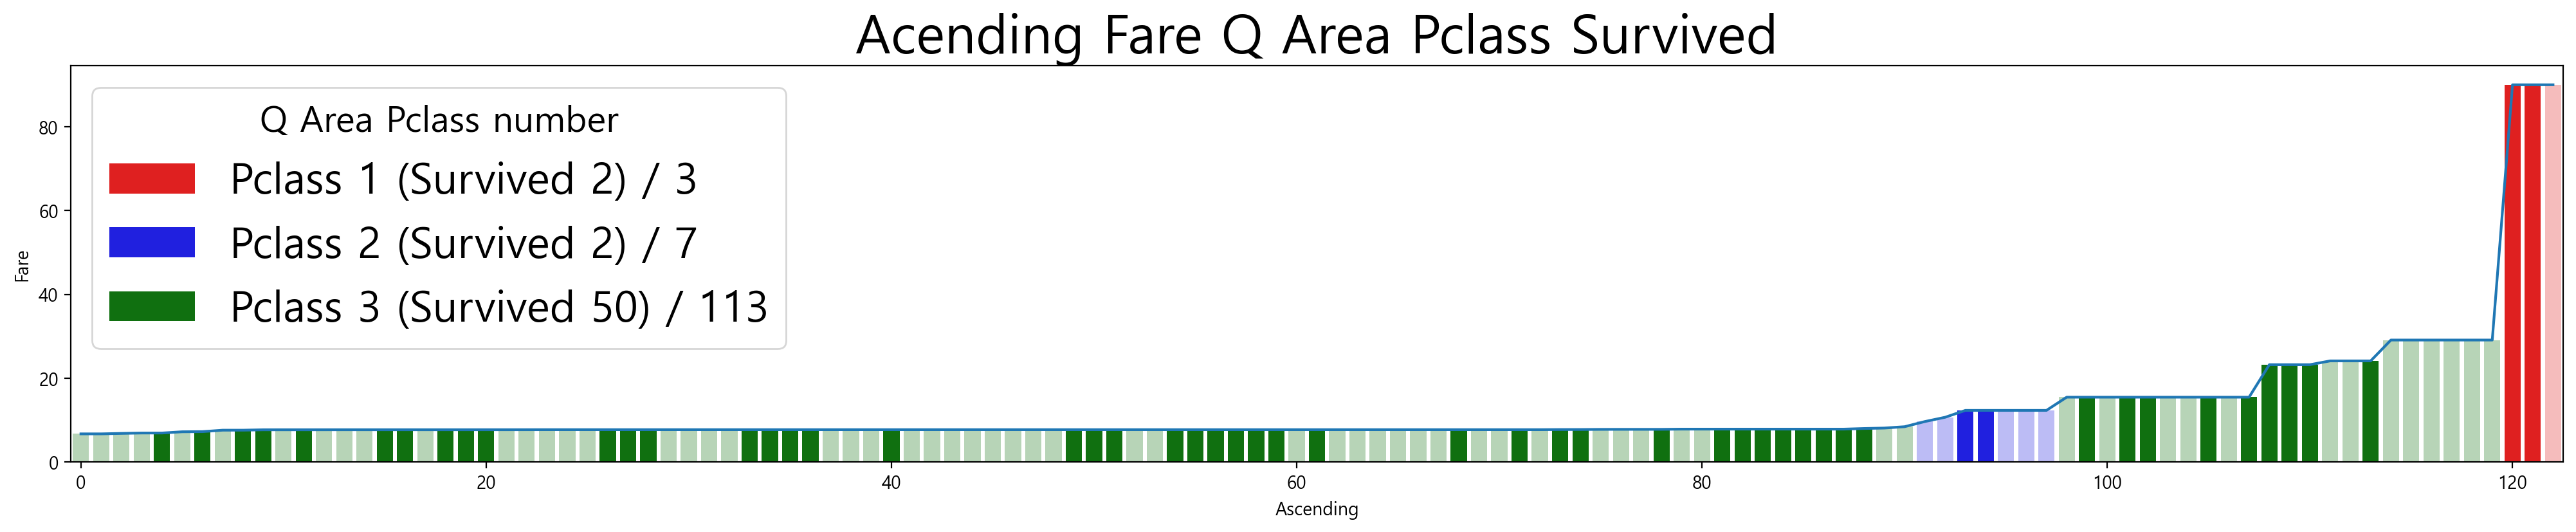

In [ ]:
# Q 지역의 티켓 값의 증가에 대한 생환자들의 등석
tdfQ = tdf[tdf['Embarked'] == 'Q']
tdfQ = tdfQ.sort_values(by=['Fare'] ,ascending=True)
tdfQ.index = range(len(tdfQ))
tdfa = tdfQ[tdfQ['Survived'] == 0]
plt.figure(figsize=(25, 4))
sns.lineplot(x=tdfQ.index, y='Fare', data=tdfQ)
ax = sns.barplot(x=tdfQ.index, y='Fare', hue='Pclass', data=tdfQ, palette={1: 'red', 2: 'blue' , 3:'green'})
sns.barplot(x=tdfQ[tdfQ['Survived'] == 0].index,y='Fare', data=tdfQ[tdfQ['Survived'] == 0], color='white', alpha=0.7)

# 범례 크기 수정과  생존 수치 추가
h,l = ax.get_legend_handles_labels()
cC = tdf[(tdf['Survived'] == 1) & (tdf['Embarked'] == 'Q')].groupby('Pclass').count()
name1 = cC.loc[1,'Survived']
name2 = cC.loc[2,'Survived']
name3 = cC.loc[3,'Survived']

cC0 = tdf[tdf['Embarked'] == 'Q'].groupby('Pclass').count()
nam1 = cC0.loc[1,'Survived']
nam2 = cC0.loc[2,'Survived']
nam3 = cC0.loc[3,'Survived']

legend_labels = {
    1: "Pclass 1 (Survived " + str(name1) +") / "+ str(nam1),
    2: "Pclass 2 (Survived " + str(name2) +") / "+ str(nam2),
    3: "Pclass 3 (Survived " + str(name3) +") / "+ str(nam3)
}


newl = [legend_labels[int(ls)] for ls in l]
ax.legend(h, newl, title='Q Area Pclass number' ,  fontsize=24, title_fontsize=20);
plt.xticks(ticks=np.arange(0, tdfQ.shape[0], 20), labels=np.arange(0, tdfQ.shape[0], 20));
plt.title("Acending Fare Q Area Pclass Survived" , fontsize=30);
plt.xlabel('Ascending');

## 탑승지(도시)에 따른 타이타닉 데이터 분석

### 도시별 나이, 성별 분포

In [ ]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Age'].notna() & df['Sex'].notna()]

# 도시 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# X축 도시 순서 고정
city_order = ['Southampton', 'Cherbourg', 'Queenstown']
df['City'] = pd.Categorical(df['City'], categories=city_order, ordered=True)

# 색상 설정
custom_palette = {'male': 'blue', 'female': 'red'}

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 시각화
sns.stripplot(
    data=df,
    x='City',
    y='Age',
    hue='Sex',
    dodge=True,
    jitter=0.25,
    alpha=0.6,
    palette=custom_palette
)

# 축, 제목 설정
plt.title('Age by City & Gender', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [ ]:
# - Southampton: 전체적으로 분포 넓음 → 근로자층 다수
# - Cherbourg: 전체 수에 비해 30 ~ 50대 여성 비중이 상대적으로 높음
# - Queenstown: 10 ~ 30대 젊은 승객 위주 → 이민자층 중심

### 도시, 성별에 따른 클래스

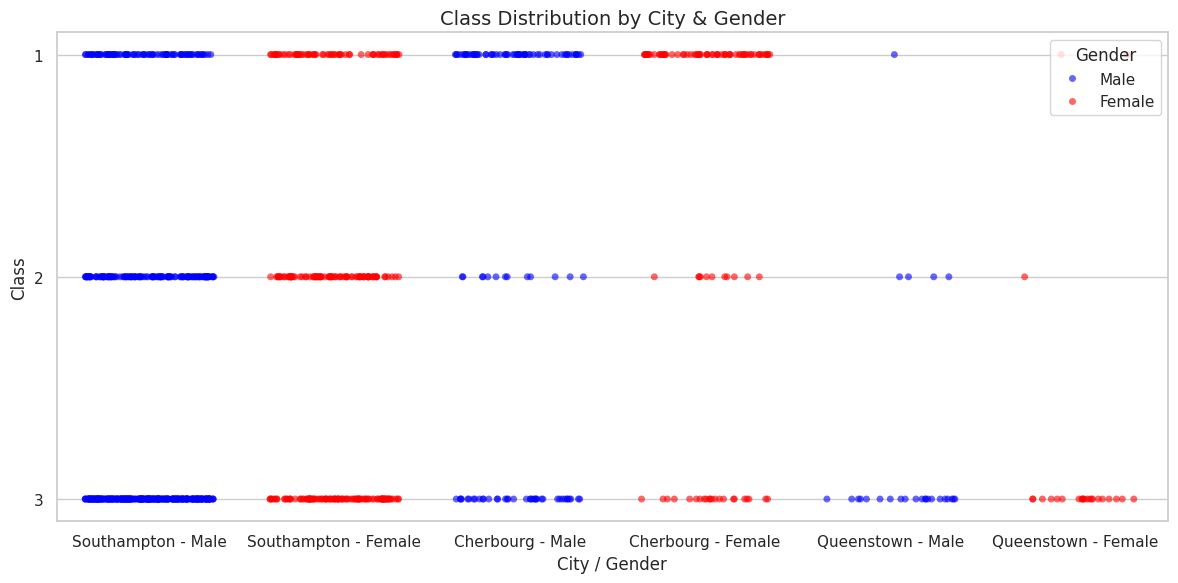

In [ ]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Pclass'].notna() & df['Sex'].notna()]

# 클래스 문자열 변환 및 등급 순서 고정
df['Pclass'] = df['Pclass'].astype(int).astype(str)
pclass_order = ['1', '2', '3']
df['Pclass'] = pd.Categorical(df['Pclass'], categories=pclass_order, ordered=True)

# 도시, 성별 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Gender'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})
df['City_Gender'] = df['City'] + ' - ' + df['Gender']

# X축 순서 고정
ordered_categories = [
    'Southampton - Male', 'Southampton - Female',
    'Cherbourg - Male', 'Cherbourg - Female',
    'Queenstown - Male', 'Queenstown - Female'
]
df['City_Gender'] = pd.Categorical(df['City_Gender'], categories=ordered_categories, ordered=True)

# 색상 설정
palette = {'Male': 'blue', 'Female': 'red'}

# 시각화
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df,
    x='City_Gender',
    y='Pclass',
    hue='Gender',
    palette=palette,
    dodge=False,
    jitter=0.35,
    alpha=0.6,
    size=5
)

# 축, 제목 설정
plt.title("Class Distribution by City & Gender", fontsize=14)
plt.xlabel("City / Gender", fontsize=12)
plt.ylabel("Class", fontsize=12)
plt.legend(title="Gender", loc='upper right')

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
# - Southampton - Male: 전 등급 고르게 분포 → 다양한 계층, 대규모 탑승
# - Cherbourg - Female: 1등급 비중 높음 → 상류층 다수
# - Queenstown - Male: 3등급 밀집 → 저가 승객

### 도시, 성별에 따른 요금

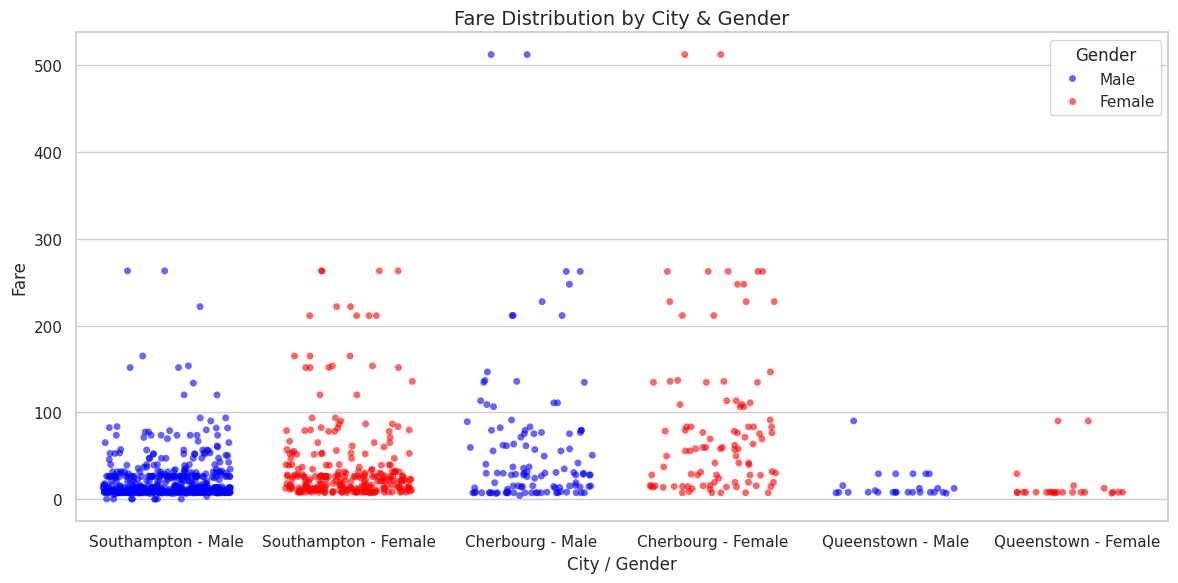

In [ ]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Fare'].notna() & df['Sex'].notna()]

# 도시, 성별 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Gender'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})
df['City_Gender'] = df['City'] + ' - ' + df['Gender']

# X축 순서 고정
ordered_categories = [
    'Southampton - Male', 'Southampton - Female',
    'Cherbourg - Male', 'Cherbourg - Female',
    'Queenstown - Male', 'Queenstown - Female'
]
df['City_Gender'] = pd.Categorical(df['City_Gender'], categories=ordered_categories, ordered=True)

# 색상 설정
palette = {'Male': 'blue', 'Female': 'red'}

# 시각화
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df,
    x='City_Gender',
    y='Fare',
    hue='Gender',
    palette=palette,
    dodge=False,
    jitter=0.35,
    alpha=0.6,
    size=5
)

# 축, 제목 설정
plt.title("Fare Distribution by City & Gender", fontsize=14)
plt.xlabel("City / Gender", fontsize=12)
plt.ylabel("Fare", fontsize=12)
plt.legend(title="Gender", loc='upper right')

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
# - Southampton - Male: 요금 분포가 넓지만 낮은 요금이 많음 → 저가 탑승자 다수
# - Cherbourg - Female: 전체 수에 비해 높은 요금 승객 많음 → 1등석 승객 다수로 추정
# - Queenstown - Male: 매우 낮은 요금 다수 → 3등급 밀집과 관련

### 도시, 성별에 따른 가족구성원 수(본인 제외)

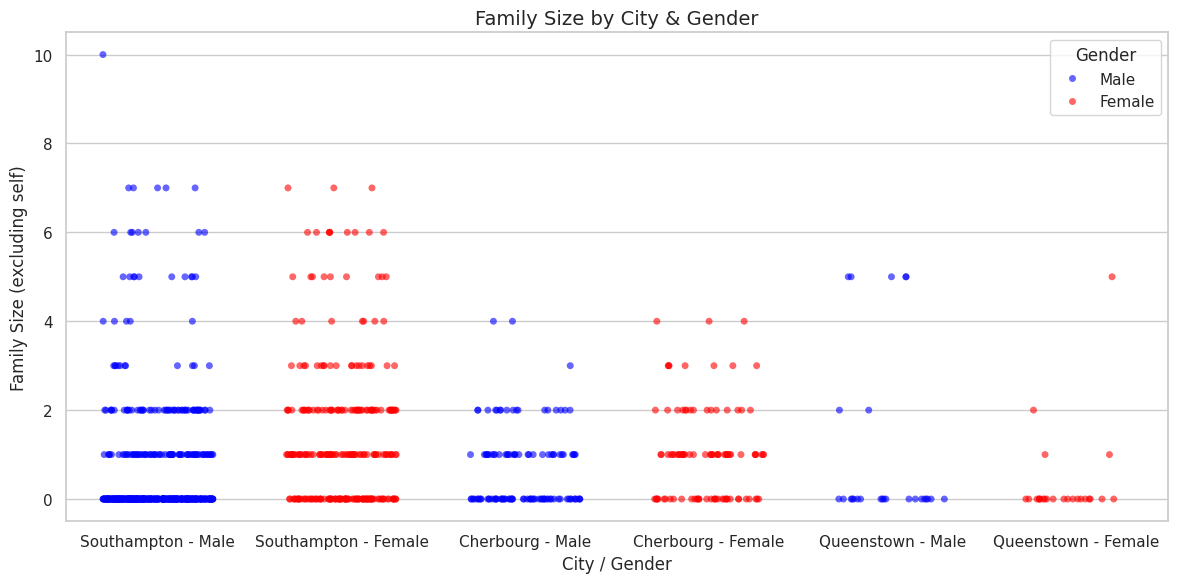

In [ ]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Sex'].notna() & df['SibSp'].notna() & df['Parch'].notna()]

# 도시, 성별 라벨 정리
df['City'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Gender'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})
df['City_Gender'] = df['City'] + ' - ' + df['Gender']

# 가족 수 계산 (본인 제외)
df['FamilySize'] = df['SibSp'] + df['Parch']

# X축 순서 고정
ordered_categories = [
    'Southampton - Male', 'Southampton - Female',
    'Cherbourg - Male', 'Cherbourg - Female',
    'Queenstown - Male', 'Queenstown - Female'
]
df['City_Gender'] = pd.Categorical(df['City_Gender'], categories=ordered_categories, ordered=True)

# 색상 설정
palette = {'Male': 'blue', 'Female': 'red'}

# 시각화
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df,
    x='City_Gender',
    y='FamilySize',
    hue='Gender',
    palette=palette,
    dodge=False,
    jitter=0.3,
    alpha=0.6,
    size=5
)

# 축, 제목 설정
plt.title("Family Size by City & Gender", fontsize=14)
plt.xlabel("City / Gender", fontsize=12)
plt.ylabel("Family Size (excluding self)", fontsize=12)
plt.legend(title="Gender", loc='upper right')

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
# - Southampton : 가족 동반 수가 많은 것도 일부 있지만 단독 탑승자도 많음 → 여러 목적으로 탑승
# - Cherbourg : 가족 동반 탑승 비율 높음 → 상류층의 가족 여행 추정
# - Queenstown : 가족 수 대부분 0 → 단독 탑승 많고 이민 목적일 가능성

### 도시별 요금에 따른 클래스

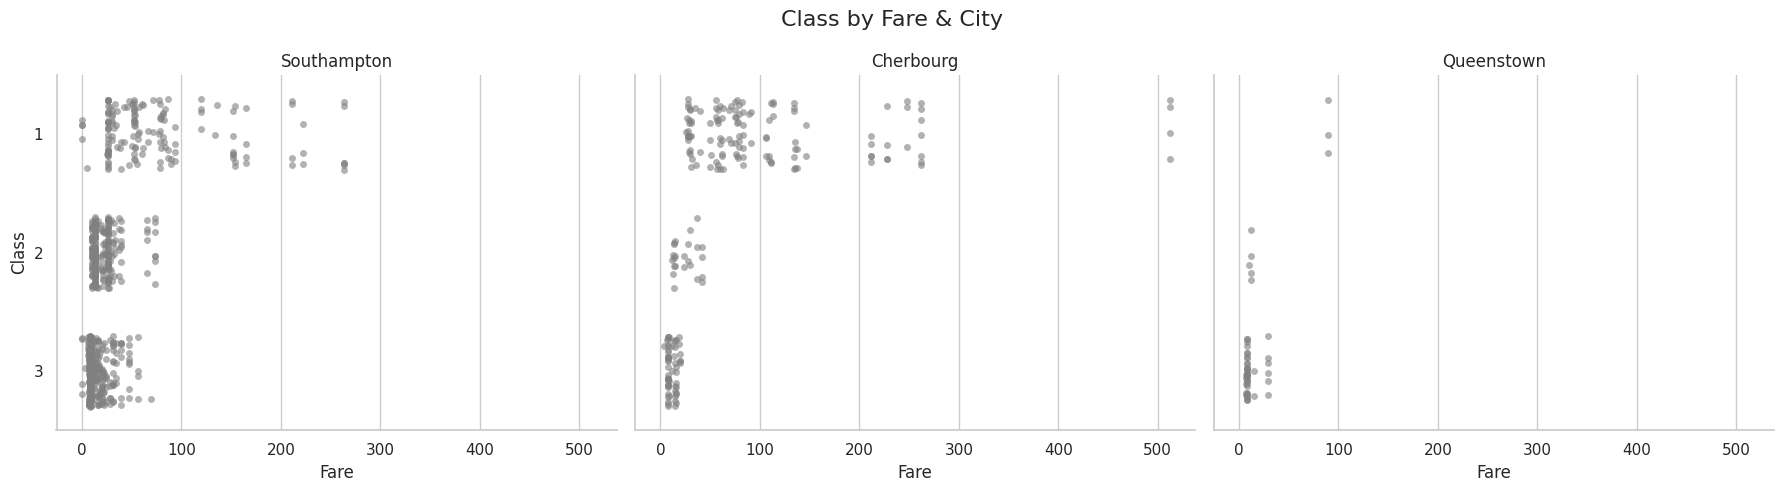

In [ ]:
# 데이터 정제
df = df[df['Embarked'].notna() & df['Sex'].notna() & df['SibSp'].notna() & df['Parch'].notna()]

# 도시 라벨 정리
df['City'] = df['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

# 순서 고정
pclass_order = ['1', '2', '3']
df['Pclass'] = df['Pclass'].astype(int).astype(str)
df['Pclass'] = pd.Categorical(df['Pclass'], categories=pclass_order, ordered=True)

# 도시별 스캐터
g = sns.FacetGrid(
    df,
    col='City',
    col_order=['Southampton', 'Cherbourg', 'Queenstown'],
    height=5,
    aspect=1.2
)

# 시각화
g.map_dataframe(
    sns.stripplot,
    x='Fare',
    y='Pclass',
    dodge=True,
    jitter=0.3,
    alpha=0.6,
    color='gray'
)

# 축 설정
g.set_axis_labels("Fare", "Class")
g.set_titles(col_template="{col_name}")

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Class by Fare & City", fontsize=16)

# 그래프 출력
plt.show()

In [ ]:
# 도시마다 가격과 등급에 관계는 차이가 딱히 없음
# 1등급으로 갈수록 가격이 제한 없이 증가하며 2, 3등급은 가격 차이가 크지 않음
# 하지만 Southampton의 경우엔 인원이 많아 3등급 좌석을 1등급보다 비싸게 탑승한 경우도 있음

## 나이 산점도

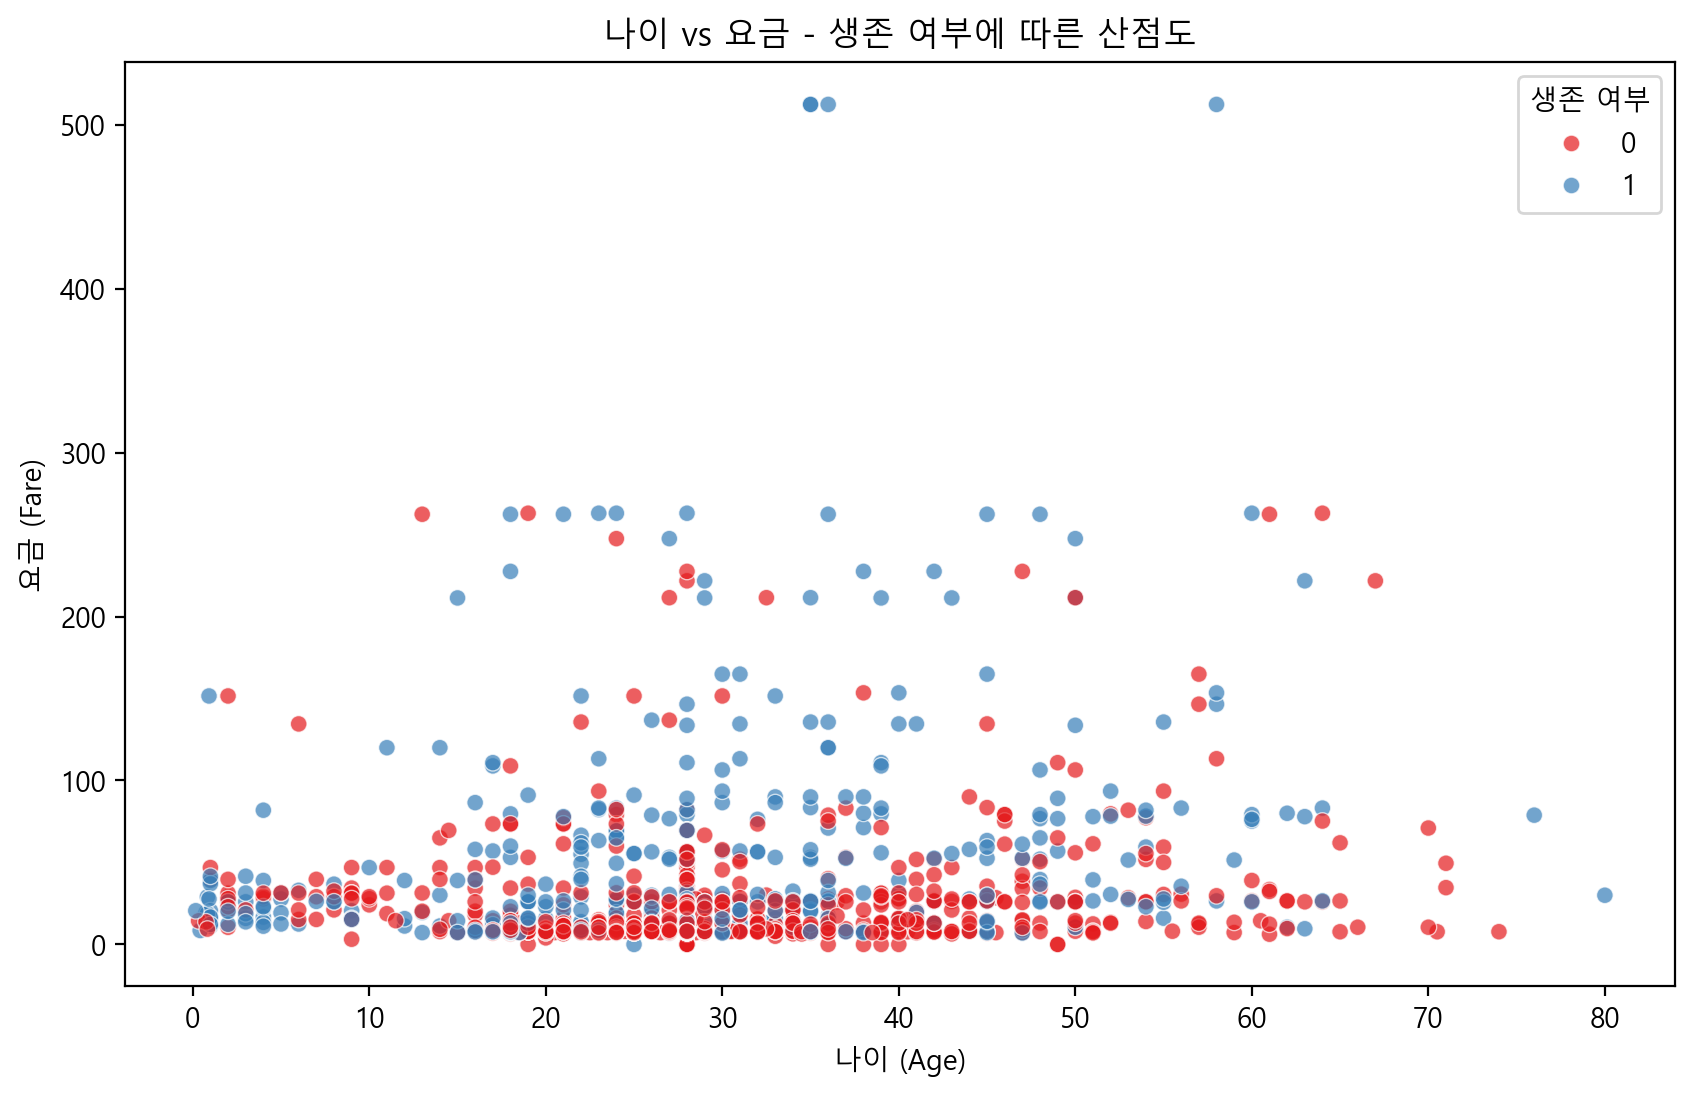

In [ ]:
# 산점도: 나이 vs 요금, 생존 여부 색상 구분
plt.figure(figsize=(10, 6))
sns.scatterplot(data= tdf, x='Age', y='Fare', hue='Survived', palette='Set1', alpha=0.7)
plt.title('나이 vs 요금 - 생존 여부에 따른 산점도')
plt.xlabel('나이 (Age)')
plt.ylabel('요금 (Fare)')
plt.legend(title='생존 여부')
plt.show()

나이대로 보면 10대가 가장 많이 생존 했고 요금이 100이 넘어가면 생존율이 높은 것을 확인 가능하다. 

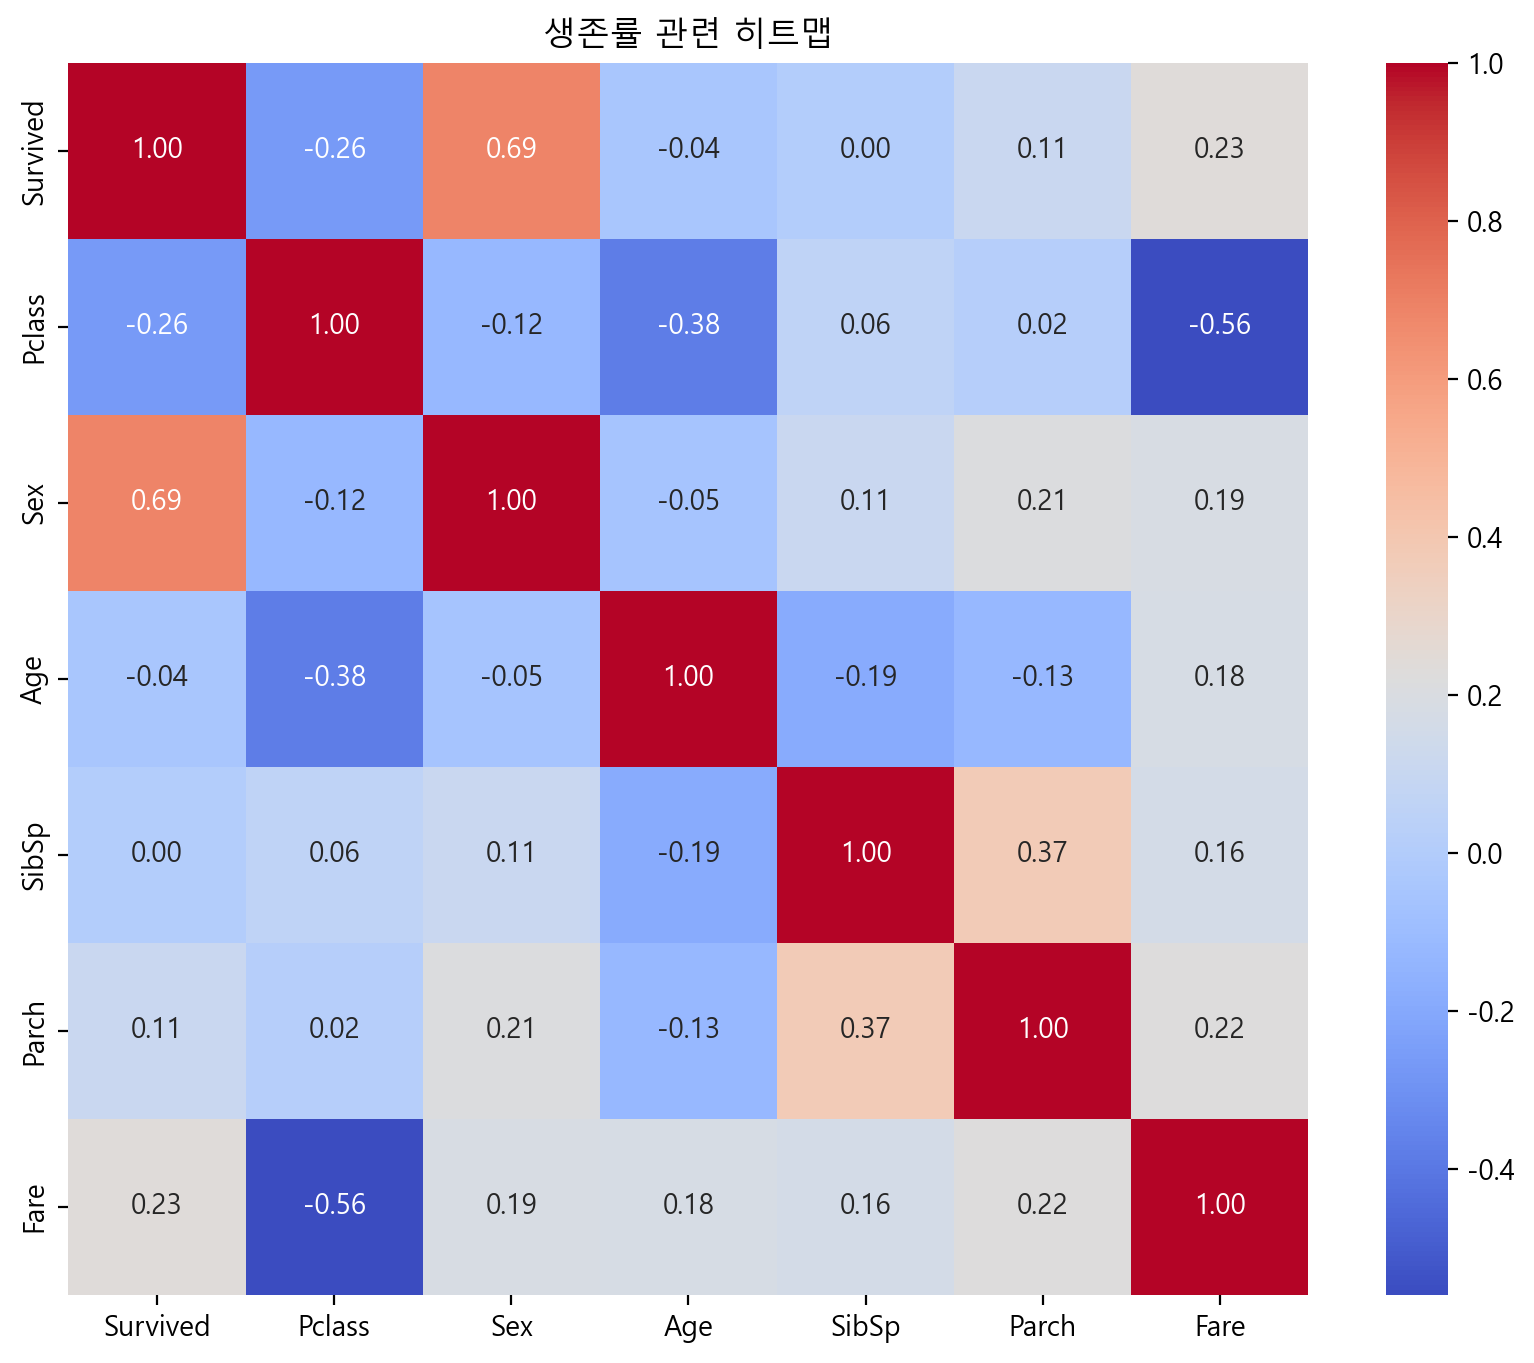

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 결측값 채우기 (단순 처리)
tdf['Age'] = tdf['Age'].fillna(tdf['Age'].median())
tdf['Fare'] = tdf['Fare'].fillna(tdf['Fare'].median())
tdf['Embarked'] = tdf['Embarked'].fillna(tdf['Embarked'].mode()[0])

# 성별 숫자 인코딩
tdf['Sex'] = tdf['Sex'].map({'male': 0, 'female': 1})

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
corr = tdf[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('생존률 관련 히트맵')
plt.show()


상관 관계에 따른 히트맵을 보면 성별, 좌석, 표가격, 동승자 순으로 생존률과 연관이 높음을 알 수 있다. 